In [1]:
import random
import math
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import nrrd

import os
import PIL
import SimpleITK as sitk
import torch
from PIL import Image, ImageOps
from torchvision.transforms.functional import pil_to_tensor
from torch.utils.data import Dataset


from main_ibot import DataAugmentationiBOT

In [10]:
type_="ct"
image_folder="../../../shared_data/NSCLC_Radiogenomics/images"
dataframe = pd.read_csv("../../../shared_data/NSCLC_Radiogenomics/info_dataset.csv")
dataframe_mode=dataframe[dataframe[f"{type_}_segmentation"]==True]

all_msk=[]

for idx in range(len(dataframe_mode)):
    file_data=dataframe_mode.iloc[idx]
    mask_path = os.path.join(image_folder,file_data["patient_id"],type_,file_data[f"{type_}_seg_name"])
    mask, _ = nrrd.read(mask_path)
    pat_mask=[]
    for i in range(np.shape(mask)[-1]):
        msk=mask[:,:,i]
        if np.sum(msk)>0:
            pat_mask.append(i)
    print(file_data["patient_id"],len(pat_mask))
    all_msk.append(pat_mask)

R01-069 22
R01-012 13
R01-117 6
R01-161 2
R01-118 7
R01-143 14
R01-157 12
R01-017 3
AMC-041 3
AMC-027 5
AMC-035 3
AMC-016 6
R01-078 13
R01-036 31
R01-110 4
R01-021 4
R01-152 22
R01-137 5
R01-087 5
R01-115 2
R01-024 5
AMC-017 9
R01-116 4
R01-145 11
R01-079 4
R01-003 4
R01-044 5
AMC-036 5
R01-080 4
R01-140 5
AMC-049 7
R01-063 6
R01-028 10
R01-054 28
R01-023 11
R01-093 7
AMC-004 3
R01-047 9
R01-151 5
AMC-040 5
R01-072 5
R01-066 13
R01-053 5
R01-005 6
R01-030 5
R01-058 5
AMC-023 5
R01-144 4
AMC-045 8
R01-091 2
R01-035 8
AMC-022 3
R01-062 5
R01-038 4
R01-089 9
R01-085 4
R01-064 13
R01-112 19
AMC-026 9
R01-148 6
R01-098 10
R01-025 11
R01-009 2
R01-132 6
R01-090 20
R01-103 14
AMC-042 5
AMC-037 17
R01-057 5
R01-014 4
R01-075 11
R01-120 4
AMC-006 4
R01-032 13
R01-088 6
R01-162 13
AMC-033 3
R01-096 5
R01-111 5
R01-043 3
AMC-021 5
AMC-024 4
R01-004 4
AMC-046 5
R01-046 6
R01-135 9
R01-050 5
R01-097 5
R01-052 6
R01-149 36
R01-029 26
R01-108 4
AMC-011 22
R01-105 5
R01-127 6
AMC-039 3
R01-101 6
R01-0

KeyboardInterrupt: 

In [ ]:
R01-149 36

In [23]:
type_="ct"
patient="R01-149"
img_path = os.path.join(image_folder,patient,type_,"R01-149_ct_image.nrrd")
img, _ = nrrd.read(img_path)
mask_path = os.path.join(image_folder,patient,type_,"R01-149_ct_segmentation.nrrd")
mask, _ = nrrd.read(mask_path)

In [38]:
def windowing_ct(width, level):
    lower_bound = level - width/2
    upper_bound = level + width/2
    return lower_bound, upper_bound

def apply_window_ct(ct, width, level):
    """ Normalize CT image using a window in the HU scale

    Args:
        ct (np.array): ct image.
        width (int): window width in the HU scale.
        level (int): center of the windows in the HU scale.

    Returns:
        ct (np.array): Normalized image in a range 0-1.

    """
    ct_min_val, ct_max_val = windowing_ct(width, level)
    print(ct_min_val, ct_max_val)
    ct_range = ct_max_val - ct_min_val
    ct = (ct - ct_min_val) / ct_range
    ct = np.clip(ct, 0, 1)
    return ct

In [42]:
np.min(img),np.max(img),np.shape(img)

(-3023, 3071, (512, 512, 299))

In [40]:
image_norm=apply_window_ct(img, width=1800, level=40)

-860.0 940.0


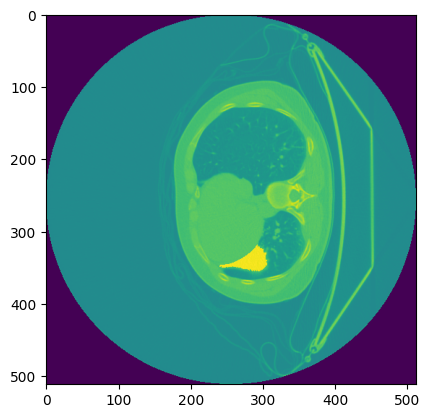

In [37]:
slc=179
thr=np.max(img[:,:,slc])
plt.imshow(mask[:,:,slc]*thr+img[:,:,slc])

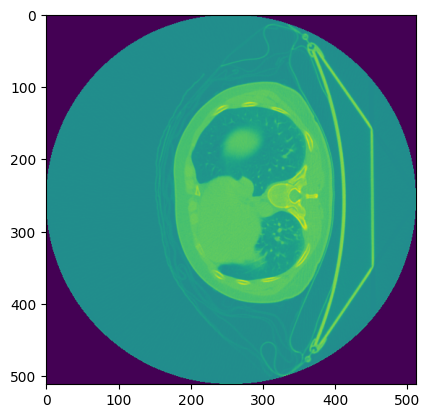

In [26]:
plt.imshow(img[:,:,177])

In [105]:
type_="pet"
folder="../../../shared_data/NSCLC_Radiogenomics"
dataframe = pd.read_csv("../../../shared_data/NSCLC_Radiogenomics/info_dataset.csv")
dataframe_mode=dataframe[dataframe[f"{type_}_segmentation"]==True]

mean=[]

for idx in range(len(dataframe_mode)):
    file_data=dataframe_mode.iloc[idx]
    patient_id=file_data["patient_id"]
    img_path = os.path.join(folder,"images",patient_id,type_,file_data[f"{type_}_img_name"])
    #pet_liver=nrrd.read(f"../../../shared_data/NSCLC_Radiogenomics/Liver_ROI/{patient_id}_pet_liver.nrrd")
    img_pet, _ = nrrd.read(img_path)

    img_pet_post=img_pet/file_data["pet_mean"]
    mean.append(np.mean(img_pet_post))
"""
    mask_path = os.path.join(image_folder,file_data["patient_id"],type_,file_data[f"{type_}_img_name"])
    mask, _ = nrrd.read(mask_path)
    pat_mask=[]
    for i in range(np.shape(mask)[-1]):
        msk=mask[:,:,i]
        if np.sum(msk)>0:
            pat_mask.append(i)
    print(file_data["patient_id"],len(pat_mask))
    all_msk.append(pat_mask)
"""

'\n    mask_path = os.path.join(image_folder,file_data["patient_id"],type_,file_data[f"{type_}_img_name"])\n    mask, _ = nrrd.read(mask_path)\n    pat_mask=[]\n    for i in range(np.shape(mask)[-1]):\n        msk=mask[:,:,i]\n        if np.sum(msk)>0:\n            pat_mask.append(i)\n    print(file_data["patient_id"],len(pat_mask))\n    all_msk.append(pat_mask)\n'

In [107]:
np.shape(mean)

(173,)

In [108]:
type_="pet"
folder="../../../shared_data/NSCLC_Radiogenomics"
dataframe = pd.read_csv("../../../shared_data/NSCLC_Radiogenomics/info_dataset.csv")
dataframe_mode=dataframe[dataframe[f"{type_}_segmentation"]==True]

mu=np.mean(mean)
std=[]

for idx in range(len(dataframe_mode)):
    file_data=dataframe_mode.iloc[idx]
    patient_id=file_data["patient_id"]
    img_path = os.path.join(folder,"images",patient_id,type_,file_data[f"{type_}_img_name"])
    #pet_liver=nrrd.read(f"../../../shared_data/NSCLC_Radiogenomics/Liver_ROI/{patient_id}_pet_liver.nrrd")
    img_pet, _ = nrrd.read(img_path)

    img_pet_post=img_pet/file_data["pet_mean"]
    var = np.mean((img_pet_post - mu) ** 2)
    std.append(var)

In [112]:
print("std: ",np.mean(mean),mu)
print("std: ",np.sqrt(np.mean(std, axis=0)))

std:  0.066005898464513 0.066005898464513
std:  0.3504835958641033


In [101]:
(0.056+0.071)/2

0.0635

In [76]:
all_msk_dict={}
for i in range(len(all_msk["mean"])):
    all_msk_dict[all_msk["name"][i]]=all_msk["mean"][i]

In [77]:
all_msk_dict

{'R01-069': 6207.614598607038,
 'R01-012': 10518.674752625202,
 'R01-117': 4695.834780516862,
 'R01-161': 10686.89855654762,
 'R01-118': 6746.900748347209,
 'R01-143': 8825.326231664541,
 'R01-157': 13841.936493055555,
 'AMC-027': 10542.702937341972,
 'AMC-035': 12964.621798547401,
 'AMC-016': 6786.193711773701,
 'R01-078': 12096.150625918217,
 'R01-036': -4607.84604519774,
 'R01-110': 4488.730086159402,
 'R01-021': 21776.006234854605,
 'R01-152': 344.0686334325397,
 'R01-137': 5439.953966699314,
 'R01-087': 6887.796532346491,
 'R01-115': 6710.144095819871,
 'R01-024': -5293.800863287561,
 'AMC-017': 14970.01315369898,
 'R01-145': 8325.221201371174,
 'R01-079': 4002.8442703232126,
 'R01-003': -5523.39085419324,
 'R01-044': 7119.146896502293,
 'AMC-036': 11803.822032683487,
 'R01-140': 9155.308923611112,
 'AMC-049': 11326.333386479591,
 'R01-063': 9891.343215811965,
 'R01-028': 8422.118058360258,
 'R01-054': 7192.383814102564,
 'R01-023': -7674.867799626413,
 'R01-093': 7427.83697248931

In [88]:
dataframe2 = pd.read_csv("../../../shared_data/NSCLC_Radiogenomics/info_dataset.csv")

In [86]:
dataframe2['pet_mean'] = dataframe2['patient_id'].map(all_msk_dict)

In [87]:
dataframe2.to_csv('../../../shared_data/NSCLC_Radiogenomics/info_dataset.csv', index=False)  


In [84]:
for i in dataframe2[dataframe2["pet_segmentation"]==True]["pet_mean"]:
    print(i)

6207.614598607038
10518.674752625202
4695.834780516862
10686.89855654762
6746.900748347209
8825.326231664541
13841.936493055555
10542.702937341972
12964.621798547401
6786.193711773701
12096.150625918217
-4607.84604519774
4488.730086159402
21776.006234854605
344.0686334325397
5439.953966699314
6887.796532346491
6710.144095819871
-5293.800863287561
14970.01315369898
8325.221201371174
4002.8442703232126
-5523.39085419324
7119.146896502293
11803.822032683487
9155.308923611112
11326.333386479591
9891.343215811965
8422.118058360258
7192.383814102564
-7674.867799626413
7427.836972489316
8101.149056085044
12637.571884920635
14586.291199252137
4789.446172591744
8713.578651942815
8004.141023596939
8274.354845127325
12564.274320981422
-9444.04216838685
6540.278345352564
10482.116908482143
9422.626474808674
15181.624613095239
17305.319310897437
-6241.797974006116
328.94897959183675
8137.961772168804
5473.424371655199
3170.153846153846
4328.166954884917
9035.653044871795
4837.098360216699
11510.814

In [91]:
dataframe2["pet_mean"][0]-70000

-63792.38540139296

In [74]:
dataframe2

,patient_id,ct_segmentation,ct_seg_name,ct_image,ct_img_name,chest_ct_segmentation,chest_ct_seg_name,chest_ct_image,chest_ct_img_name,pet_segmentation,pet_seg_name,pet_image,pet_img_name
0,R01-069,True,R01-069_ct_segmentation.nrrd,True,R01-069_ct_image.nrrd,True,R01-069_chest_ct_segmentation.dcm,True,R01-069_chest_ct_image.nrrd,True,R01-069_pet_segmentation.nrrd,True,R01-069_pet_image.nrrd
1,R01-012,True,R01-012_ct_segmentation.nrrd,True,R01-012_ct_image.nrrd,True,R01-012_chest_ct_segmentation.dcm,True,R01-012_chest_ct_image.nrrd,True,R01-012_pet_segmentation.nrrd,True,R01-012_pet_image.nrrd
2,R01-117,True,R01-117_ct_segmentation.nrrd,True,R01-117_ct_image.nrrd,True,R01-117_chest_ct_segmentation.dcm,True,R01-117_chest_ct_image.nrrd,True,R01-117_pet_segmentation.nrrd,True,R01-117_pet_image.nrrd
3,R01-161,True,R01-161_ct_segmentation.nrrd,True,R01-161_ct_image.nrrd,False,NaN,False,NaN,True,R01-161_pet_segmentation.nrrd,True,R01-161_pet_image.nrrd
4,R01-118,True,R01-118_ct_segmentation.nrrd,True,R01-118_ct_image.nrrd,True,R01-118_chest_ct_segmentation.dcm,True,R01-118_chest_ct_image.nrrd,True,R01-118_pet_segmentation.nrrd,True,R01-118_pet_image.nrrd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,R01-071,True,R01-071_ct_segmentation.nrrd,True,R01-071_ct_image.nrrd,True,R01-071_chest_ct_segmentation.dcm,True,R01-071_chest_ct_image.nrrd,True,R01-071_pet_segmentation.nrrd,True,R01-071_pet_image.nrrd
203,R01-102,True,R01-102_ct_segmentation.nrrd,True,R01-102_ct_image.nrrd,True,R01-102_chest_ct_segmentation.nrrd,True,R01-102_chest_ct_image.nrrd,True,R01-102_pet_segmentation.nrrd,True,R01-102_pet_image.nrrd
204,R01-100,True,R01-100_ct_segmentation.nrrd,True,R01-100_ct_image.nrrd,True,R01-100_chest_ct_segmentation.nrrd,True,R01-100_chest_ct_image.nrrd,True,R01-100_pet_segmentation.nrrd,True,R01-100_pet_image.nrrd
205,R01-146,True,R01-146_ct_segmentation.nrrd,True,R01-146_ct_image.nrrd,True,R01-146_chest_ct_segmentation.dcm,True,R01-146_chest_ct_image.nrrd,True,R01-146_pet_segmentation.nrrd,True,R01-146_pet_image.nrrd


In [1]:
ls

docexplore_dataloader.py     loader.py         mods_dataset.npy     test.ipynb
extract_backbone_weights.py  main_ibot.py      normal_date.npy      utils.py
get_values.py                models/           __pycache__/
__init__.py                  model_test.ipynb  steps_dataset.ipynb


In [1]:
import numpy as np
xd=np.load("mods_dataset.npy",allow_pickle=True)

In [4]:
import pandas as pd
pd.DataFrame(xd[0]["results"])

,names,mean,median,var,std,max,min
0,R01-069,0.143401,-0.514036,0.944262,0.971732,3.908902,-0.544424
1,R01-012,0.038912,-0.590402,1.066482,1.032706,4.523605,-0.748454
2,R01-117,0.234782,-0.590402,1.390468,1.179181,4.256907,-0.590402
3,R01-161,0.159188,-0.590402,1.139679,1.067557,3.823650,-0.590402
4,R01-118,0.254331,-0.513454,1.189923,1.090836,4.012526,-0.590402
...,...,...,...,...,...,...,...
379,R01-071,-0.057669,-0.545568,0.772574,0.878962,3.924570,-0.561197
380,R01-102,0.567573,0.364352,1.330576,1.153506,4.694861,-0.978952
381,R01-100,-0.159788,-0.590402,0.872205,0.933919,4.256907,-0.590402
382,R01-146,-0.050005,-0.590402,0.963333,0.981495,4.256907,-0.590402


In [29]:
data_normal=np.load("normal_date.npy",allow_pickle=True)
keys=data_normal[0]["results"].keys()
ia=0
for i in keys:
    if ia<1:
        ia+=1
        print("xd")
        continue
    print(np.mean(data_normal[0]["results"][i]))

xd
0.24866372
-0.3207601
1.1831337
1.085241
4.5769095
-0.91987973


In [20]:
for i in keys:
    print(i)

names
mean
median
var
std
max
min


In [32]:
pd.DataFrame(data_normal[0]["results"]).describe()

,mean,median,var,std,max,min
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.248664,-0.320760,1.183134,1.085241,4.576910,-0.919880
std,0.247806,0.598913,0.153924,0.073579,0.079643,0.113670
min,-0.239968,-0.590402,0.677703,0.823227,4.420705,-1.281774
25%,0.059941,-0.590402,1.104522,1.050962,4.513453,-0.988348
50%,0.223310,-0.590402,1.210979,1.100445,4.573065,-0.914073
75%,0.415019,-0.529248,1.293682,1.137401,4.629045,-0.842746
max,0.909960,1.466669,1.490602,1.220902,4.813035,-0.716473


In [33]:
mods_dataset=np.load("mods_dataset.npy",allow_pickle=True)

In [42]:
for i in range(len(mods_dataset)):
    data_info=mods_dataset[i]
    print("mode : ",data_info["mode"],"bcsh : ",data_info["bcsh"])
    print(pd.DataFrame(data_info["results"]).describe())

mode :  ct bcsh :  [0.1, 0.1, 0.1, 0]
             mean      median         var         std         max         min
count  384.000000  384.000000  384.000000  384.000000  384.000000  384.000000
mean     0.246092   -0.378917    1.167814    1.075807    4.231297   -0.663494
std      0.242920    0.530138    0.218506    0.102378    0.231798    0.150316
min     -0.293667   -0.590402    0.551438    0.742589    3.608830   -1.249271
25%      0.074987   -0.590402    1.012898    1.006428    4.061619   -0.590402
50%      0.225254   -0.586721    1.170683    1.081981    4.256907   -0.590402
75%      0.402503   -0.515098    1.305750    1.142694    4.256907   -0.590402
max      1.158561    1.566915    1.785165    1.336100    4.694861   -0.518478
mode :  ct bcsh :  [0.1, 0.1, 0.1, 0]
             mean      median         var         std         max         min
count  384.000000  384.000000  384.000000  384.000000  384.000000  384.000000
mean     0.246092   -0.378917    1.167814    1.075807    4.231297 

In [3]:
from loader import PETCTFolderMask3D_MLNS

In [4]:
data_test=PETCTFolderMask3D_MLNS(
    "../../../data/Mediastinal-Lymph-Node-SEG/Mediastinal-Lymph-Node-SEG-DA-RAD/Mediastinal-Lymph-Node-SEG", 
    "../MLNS.csv", 
    "ct", 
    patch_size=8*8,
    pred_ratio=[0,0.3],
    pred_ratio_var=[0,0.2],
    pred_aspect_ratio=(0.3, 1/0.3),
    pred_shape="block",
    pred_start_epoch=0,
    batch_size=256
)

In [5]:
img,mask,mkas2=data_test[5]
len(data_test)

427

In [6]:
img.shape

torch.Size([256, 1, 512, 512])

tensor(0.1705) tensor(1.)


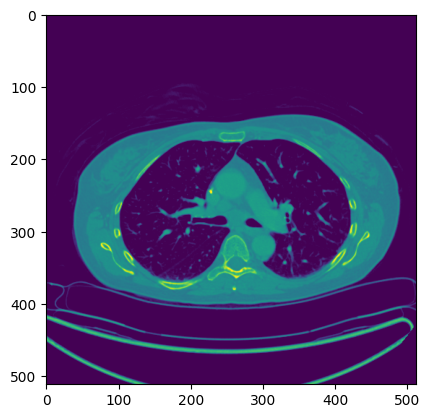

In [12]:
plt.imshow(img[34,0,:,:])
print(img.mean(),img.max())